<a href="https://colab.research.google.com/github/archangel2006/PYML-2025/blob/main/PYML14%20(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 2. Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Feature Scaling
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# 4. Define SVM model
svm_model = SVC()

In [ ]:
# 5. Set up hyperparameter

param_grid = {'C':[0.1,1,10],
              'kernel': ['linear','rbf','poly'],
              'gamma':[0.001,0.01,0.1,'scale','auto']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 6. GridSearchCV with s-fold cross-validation

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
# 7. Best hyperparameters

print(f'Best Hyperparameters: {grid_search.best_params_}')

Best Hyperparameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# 8. Cross-validated accuracy  of best model

cv_scores = cross_val_score(grid_search.best_estimator_,x_train_scaled,y_train,cv=5)
print(f'{cv_scores}')
np.mean(cv_scores)

[0.96703297 1.         0.95604396 0.98901099 0.98901099]


np.float64(0.9802197802197803)

In [ ]:
# 9. Ealuate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[41,  1],
       [ 1, 71]])

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98        42\n           1       0.99      0.99      0.99        72\n\n    accuracy                           0.98       114\n   macro avg       0.98      0.98      0.98       114\nweighted avg       0.98      0.98      0.98       114\n'

<Axes: >

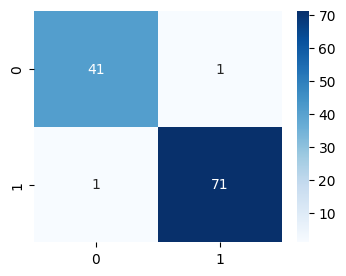

In [ ]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')